In [126]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df=pd.read_csv('/Users/zxgan/Downloads/DA DS 1.csv')
print(df)

                    Country Name        1960        1961        1962   
0                          Aruba         NaN         NaN         NaN  \
1    Africa Eastern and Southern  141.385955  144.342434  148.774835   
2                    Afghanistan   62.369375   62.443703   60.950364   
3     Africa Western and Central  107.053706  112.128417  117.814663   
4                         Angola         NaN         NaN         NaN   
..                           ...         ...         ...         ...   
261                       Kosovo         NaN         NaN         NaN   
262                  Yemen, Rep.         NaN         NaN         NaN   
263                 South Africa  529.561923  543.042224  560.699395   
264                       Zambia  228.567398  216.274674  208.562685   
265                     Zimbabwe  276.643363  279.332656  275.966139   

           1963        1964        1965        1966        1967        1968   
0           NaN         NaN         NaN         NaN     

In [127]:
# 1. Keep only the data after 2002
df = df[['Country Name'] + [str(year) for year in range(2000, 2023)]]

# 2. Remove the data that has more than 10 years of null values
df = df[df.isnull().sum(axis=1) <= 10]

# 3. Fill in the null values by predicting the values using IterativeImputer
numeric_data = df.select_dtypes(include=[float]).to_numpy()
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(numeric_data)

# Replace the numeric columns with the imputed values
df[df.select_dtypes(include=[float]).columns] = imputed_data

# Output the processed DataFrame
print(df)
df.to_csv('cleaned_dataset.csv', index=False)

                    Country Name          2000          2001          2002   
0                          Aruba  21026.167090  20911.192770  21375.269120  \
1    Africa Eastern and Southern    710.665706    631.595695    631.928282   
2                    Afghanistan    498.708320    427.302285    182.174037   
3     Africa Western and Central    519.757395    532.272576    619.712652   
4                         Angola    556.884244    527.464118    872.657638   
..                           ...           ...           ...           ...   
261                       Kosovo   8321.285240   7779.948741   8226.642201   
262                  Yemen, Rep.    519.591639    514.692341    543.900068   
263                 South Africa   3241.661396   2867.472497   2708.423333   
264                       Zambia    364.026145    401.732316    399.099078   
265                     Zimbabwe    565.284390    569.003209    529.186883   

             2003          2004          2005          2006    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [128]:
region_mapping = {
    'Aruba': 'Latin America and Caribbean',
    'Africa Eastern and Southern': 'Sub-Saharan Africa',
    'Afghanistan': 'Central and Southern Asia',
    'Africa Western and Central': 'Sub-Saharan Africa',
    'Angola': 'Sub-Saharan Africa',
    'Albania': 'Europe and Northern America',
    'Andorra': 'Europe and Northern America',
    'Arab World': 'Northern Africa and Western Asia',
    'United Arab Emirates': 'Northern Africa and Western Asia',
    'Argentina': 'Latin America and Caribbean',
    'Armenia': 'Northern Africa and Western Asia',
    'American Samoa': 'Oceania',
    'Antigua and Barbuda': 'Latin America and Caribbean',
    'Australia': 'Oceania',
    'Austria': 'Europe and Northern America',
    'Azerbaijan': 'Northern Africa and Western Asia',
    'Burundi': 'Sub-Saharan Africa',
    'Belgium': 'Europe and Northern America',
    'Benin': 'Sub-Saharan Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Bangladesh': 'Central and Southern Asia',
    'Bulgaria': 'Europe and Northern America',
    'Bahrain': 'Northern Africa and Western Asia',
    'Bahamas, The': 'Latin America and Caribbean',
    'Bosnia and Herzegovina': 'Europe and Northern America',
    'Belarus': 'Europe and Northern America',
    'Belize': 'Latin America and Caribbean',
    'Bermuda': 'Europe and Northern America',
    'Bolivia': 'Latin America and Caribbean',
    'Brazil': 'Latin America and Caribbean',
    'Barbados': 'Latin America and Caribbean',
    'Brunei Darussalam': 'Eastern and South-Eastern Asia',
    'Bhutan': 'Central and Southern Asia',
    'Botswana': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Canada': 'Europe and Northern America',
    'Central Europe and the Baltics': 'Europe and Northern America',
    'Switzerland': 'Europe and Northern America',
    'Channel Islands': 'Europe and Northern America',
    'Chile': 'Latin America and Caribbean',
    'China': 'Eastern and South-Eastern Asia',
    'Cote d\'Ivoire': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Congo, Dem. Rep.': 'Sub-Saharan Africa',
    'Congo, Rep.': 'Sub-Saharan Africa',
    'Colombia': 'Latin America and Caribbean',
    'Comoros': 'Sub-Saharan Africa',
    'Cabo Verde': 'Sub-Saharan Africa',
    'Costa Rica': 'Latin America and Caribbean',
    'Caribbean small states': 'Latin America and Caribbean',
    'Cuba': 'Latin America and Caribbean',
    'Cayman Islands': 'Latin America and Caribbean',
    'Cyprus': 'Northern Africa and Western Asia',
    'Czechia': 'Europe and Northern America',
    'Germany': 'Europe and Northern America',
    'Djibouti': 'Northern Africa and Western Asia',
    'Dominica': 'Latin America and Caribbean',
    'Denmark': 'Europe and Northern America',
    'Dominican Republic': 'Latin America and Caribbean',
    'Algeria': 'Northern Africa and Western Asia',
    'East Asia & Pacific (excluding high income)': 'Eastern and South-Eastern Asia',
    'Early-demographic dividend': 'Various',
    'East Asia & Pacific': 'Eastern and South-Eastern Asia',
    'Europe & Central Asia (excluding high income)': 'Europe and Northern America',
    'Europe & Central Asia': 'Europe and Northern America',
    'Ecuador': 'Latin America and Caribbean',
    'Egypt, Arab Rep.': 'Northern Africa and Western Asia',
    'Euro area': 'Europe and Northern America',
    'Spain': 'Europe and Northern America',
    'Estonia': 'Europe and Northern America',
    'Ethiopia': 'Sub-Saharan Africa',
    'European Union': 'Europe and Northern America',
    'Fragile and conflict affected situations': 'Various',
    'Finland': 'Europe and Northern America',
    'Fiji': 'Oceania',
    'France': 'Europe and Northern America',
    'Faroe Islands': 'Europe and Northern America',
    'Micronesia, Fed. Sts.': 'Oceania',
    'Gabon': 'Sub-Saharan Africa',
    'United Kingdom': 'Europe and Northern America',
    'Georgia': 'Northern Africa and Western Asia',
    'Ghana': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Gambia, The': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Greece': 'Europe and Northern America',
    'Grenada': 'Latin America and Caribbean',
    'Greenland': 'Europe and Northern America',
    'Guatemala': 'Latin America and Caribbean',
    'Guam': 'Oceania',
    'Guyana': 'Latin America and Caribbean',
    'High income': 'Various',
    'Hong Kong SAR, China': 'Eastern and South-Eastern Asia',
    'Honduras': 'Latin America and Caribbean',
    'Heavily indebted poor countries (HIPC)': 'Various',
    'Croatia': 'Europe and Northern America',
    'Haiti': 'Latin America and Caribbean',
    'Hungary': 'Europe and Northern America',
    'IBRD only': 'Various',
    'IDA & IBRD total': 'Various',
    'IDA total': 'Various',
    'IDA blend': 'Various',
    'Indonesia': 'Eastern and South-Eastern Asia',
    'IDA only': 'Various',
    'Isle of Man': 'Europe and Northern America',
    'India': 'Central and Southern Asia',
    'Ireland': 'Europe and Northern America',
    'Iran, Islamic Rep.': 'Central and Southern Asia',
    'Iraq': 'Northern Africa and Western Asia',
    'Iceland': 'Europe and Northern America',
    'Israel': 'Northern Africa and Western Asia',
    'Italy': 'Europe and Northern America',
    'Jamaica': 'Latin America and Caribbean',
    'Jordan': 'Northern Africa and Western Asia',
    'Japan': 'Eastern and South-Eastern Asia',
    'Kazakhstan': 'Central and Southern Asia',
    'Kenya': 'Sub-Saharan Africa',
    'Kyrgyz Republic': 'Central and Southern Asia',
    'Cambodia': 'Eastern and South-Eastern Asia',
    'Kiribati': 'Oceania',
    'St. Kitts and Nevis': 'Latin America and Caribbean',
    'Korea, Rep.': 'Eastern and South-Eastern Asia',
    'Kuwait': 'Northern Africa and Western Asia',
    'Latin America & Caribbean (excluding high income)': 'Latin America and Caribbean',
    'Lao PDR': 'Eastern and South-Eastern Asia',
    'Lebanon': 'Northern Africa and Western Asia',
    'Liberia': 'Sub-Saharan Africa',
    'Libya': 'Northern Africa and Western Asia',
    'St. Lucia': 'Latin America and Caribbean',
    'Latin America & Caribbean': 'Latin America and Caribbean',
    'Least developed countries: UN classification': 'Various',
    'Low income': 'Various',
    'Liechtenstein': 'Europe and Northern America',
    'Sri Lanka': 'Central and Southern Asia',
    'Lower middle income': 'Various',
    'Low & middle income': 'Various',
    'Lesotho': 'Sub-Saharan Africa',
    'Late-demographic dividend': 'Various',
    'Lithuania': 'Europe and Northern America',
    'Luxembourg': 'Europe and Northern America',
    'Latvia': 'Europe and Northern America',
    'Macao SAR, China': 'Eastern and South-Eastern Asia',
    'Morocco': 'Northern Africa and Western Asia',
    'Monaco': 'Europe and Northern America',
    'Moldova': 'Europe and Northern America',
    'Madagascar': 'Sub-Saharan Africa',
    'Maldives': 'Central and Southern Asia',
    'Middle East & North Africa': 'Northern Africa and Western Asia',
    'Mexico': 'Latin America and Caribbean',
    'Marshall Islands': 'Oceania',
    'Middle income': 'Various',
    'North Macedonia': 'Europe and Northern America',
    'Mali': 'Sub-Saharan Africa',
    'Malta': 'Europe and Northern America',
    'Myanmar': 'Eastern and South-Eastern Asia',
    'Middle East & North Africa (excluding high income)': 'Northern Africa and Western Asia',
    'Montenegro': 'Europe and Northern America',
    'Mongolia': 'Eastern and South-Eastern Asia',
    'Northern Mariana Islands': 'Oceania',
    'Mozambique': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Malaysia': 'Eastern and South-Eastern Asia',
    'North America': 'Europe and Northern America',
    'Namibia': 'Sub-Saharan Africa',
    'New Caledonia': 'Oceania',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'Nicaragua': 'Latin America and Caribbean',
    'Netherlands': 'Europe and Northern America',
    'Norway': 'Europe and Northern America',
    'Nepal': 'Central and Southern Asia',
    'Nauru': 'Oceania',
    'New Zealand': 'Oceania',
    'OECD members': 'Various',
    'Oman': 'Northern Africa and Western Asia',
    'Other small states': 'Various',
    'Pakistan': 'Central and Southern Asia',
    'Panama': 'Latin America and Caribbean',
    'Peru': 'Latin America and Caribbean',
    'Philippines': 'Eastern and South-Eastern Asia',
    'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Poland': 'Europe and Northern America',
    'Pre-demographic dividend': 'Various',
    'Puerto Rico': 'Latin America and Caribbean',
    'Korea, Dem. People’s Rep.': 'Eastern and South-Eastern Asia',
    'Portugal': 'Europe and Northern America',
    'Paraguay': 'Latin America and Caribbean',
    'West Bank and Gaza': 'Northern Africa and Western Asia',
    'Pacific island small states': 'Oceania',
    'Post-demographic dividend': 'Various',
    'French Polynesia': 'Oceania',
    'Qatar': 'Northern Africa and Western Asia',
    'Romania': 'Europe and Northern America',
    'Russian Federation': 'Europe and Northern America',
    'Rwanda': 'Sub-Saharan Africa',
    'South Asia': 'Central and Southern Asia',
    'Saudi Arabia': 'Northern Africa and Western Asia',
    'Sudan': 'Northern Africa and Western Asia',
    'Senegal': 'Sub-Saharan Africa',
    'Singapore': 'Eastern and South-Eastern Asia',
    'Solomon Islands': 'Oceania',
    'Sierra Leone': 'Sub-Saharan Africa',
    'El Salvador': 'Latin America and Caribbean',
    'San Marino': 'Europe and Northern America',
    'Somalia': 'Sub-Saharan Africa',
    'Serbia': 'Europe and Northern America',
    'Sub-Saharan Africa (excluding high income)': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Sub-Saharan Africa': 'Sub-Saharan Africa',
    'Small states': 'Various',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Suriname': 'Latin America and Caribbean',
    'Slovak Republic': 'Europe and Northern America',
    'Slovenia': 'Europe and Northern America',
    'Sweden': 'Europe and Northern America',
    'Eswatini': 'Sub-Saharan Africa',
    'Sint Maarten (Dutch part)': 'Latin America and Caribbean',
    'Seychelles': 'Sub-Saharan Africa',
    'Syrian Arab Republic': 'Northern Africa and Western Asia',
    'Turks and Caicos Islands': 'Latin America and Caribbean',
    'Chad': 'Sub-Saharan Africa',
    'East Asia & Pacific (IDA & IBRD countries)': 'Eastern and South-Eastern Asia',
    'Europe & Central Asia (IDA & IBRD countries)': 'Europe and Northern America',
    'Togo': 'Sub-Saharan Africa',
    'Thailand': 'Eastern and South-Eastern Asia',
    'Tajikistan': 'Central and Southern Asia',
    'Turkmenistan': 'Central and Southern Asia',
    'Latin America & the Caribbean (IDA & IBRD countries)': 'Latin America and Caribbean',
    'Timor-Leste': 'Eastern and South-Eastern Asia',
    'Middle East & North Africa (IDA & IBRD countries)': 'Northern Africa and Western Asia',
    'Tonga': 'Oceania',
    'South Asia (IDA & IBRD)': 'Central and Southern Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)': 'Sub-Saharan Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Tunisia': 'Northern Africa and Western Asia',
    'Turkey': 'Northern Africa and Western Asia',
    'Tuvalu': 'Oceania',
    'Tanzania': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Ukraine': 'Europe and Northern America',
    'Upper middle income': 'Various',
    'Uruguay': 'Latin America and Caribbean',
    'United States': 'Europe and Northern America',
    'Uzbekistan': 'Central and Southern Asia',
    'St. Vincent and the Grenadines': 'Latin America and Caribbean',
    'Venezuela, RB': 'Latin America and Caribbean',
    'British Virgin Islands': 'Latin America and Caribbean',
    'Virgin Islands (U.S.)': 'Latin America and Caribbean',
    'Vietnam': 'Eastern and South-Eastern Asia',
    'Vanuatu': 'Oceania',
    'World': 'World',
    'Samoa': 'Oceania',
    'Kosovo': 'Europe and Northern America',
    'Yemen, Rep.': 'Northern Africa and Western Asia',
    'South Africa': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
}


In [129]:
import matplotlib.pyplot as plt

# Map countries to regions
df['Region'] = df['Country Name'].map(region_mapping)

# Convert from wide format to long format
df_long = pd.melt(df, id_vars=['Country Name'], var_name='Year', value_name='GDP')

# Map each country to its region
df_long['Region'] = df_long['Country Name'].map(region_mapping)


In [130]:
#find the higest and lowest mean GDP of the countries 
df_data=pd.read_csv('long_format.csv')
mean_gdp = df_data.groupby('Country Name')['GDP'].mean()
highest_gdp = mean_gdp.idxmax()
lowest_gdp = mean_gdp.idxmin()
print(f'Highest GDP: {highest_gdp} ({mean_gdp[highest_gdp]})')
print(f'Lowest GDP: {lowest_gdp} ({mean_gdp[lowest_gdp]})')


Highest GDP: Monaco (164373.69844217392)
Lowest GDP: Burundi (202.03719099130436)


In [131]:
#find the higest and lowest GDP growth of the countries 
df_data['GDP Growth'] = df_data.groupby('Country Name')['GDP'].pct_change()
mean_gdp_growth = df_data.groupby('Country Name')['GDP Growth'].mean()
highest_growth = mean_gdp_growth.idxmax()
lowest_growth = mean_gdp_growth.idxmin()
print(f'Highest GDP Growth: {highest_growth} ({mean_gdp_growth[highest_growth]})')
print(f'Lowest GDP Growth: {lowest_growth} ({mean_gdp_growth[lowest_growth]})')


Highest GDP Growth: Guyana (0.18792426978112967)
Lowest GDP Growth: Cayman Islands (-1.3331332468736312)


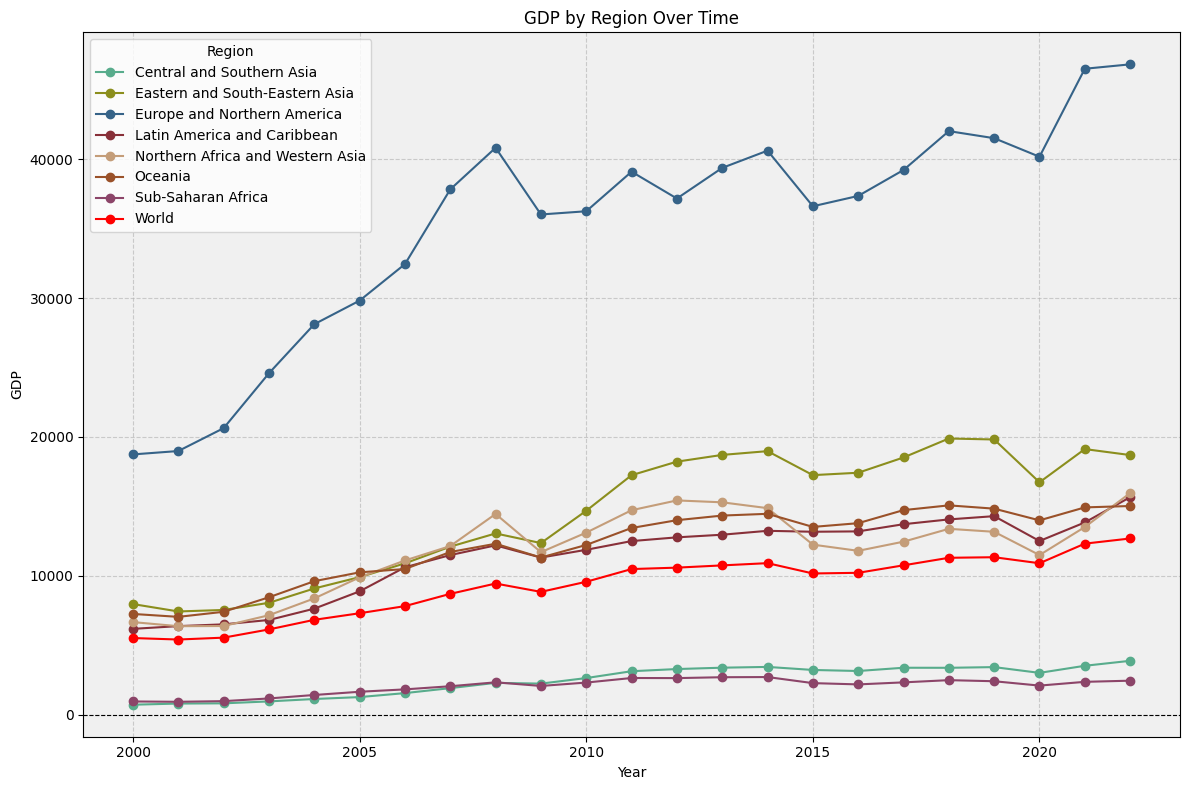

In [132]:
df_final=pd.read_csv('long_format.csv')

df_final = df_final[df_final['Region'] != 'Various']

# Custom color palette for regions
colors = {
    'Central and Southern Asia': '#58ac8c',
    'Eastern and South-Eastern Asia': '#8b8e1d',
    'Europe and Northern America': '#366388',
    'Latin America and Caribbean': '#883039',
    'Middle East and North Africa': '#ff7f00',
    'Northern Africa and Western Asia': '#c49d79',
    'Oceania': '#9a5129',
    'Sub-Saharan Africa': '#8c4569',
    'World': '#ff0000'
}

# Plot the GDP of each region over time
plt.figure(figsize=(12, 8))

for region, data in df_final.groupby('Region'):
    data = data.groupby('Year')['GDP'].mean()
    plt.plot(data.index, data.values, label=region, color=colors[region], marker='o')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP by Region Over Time')
plt.legend(title='Region', loc='upper left')

# Customizing grid and background
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f0f0f0')

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

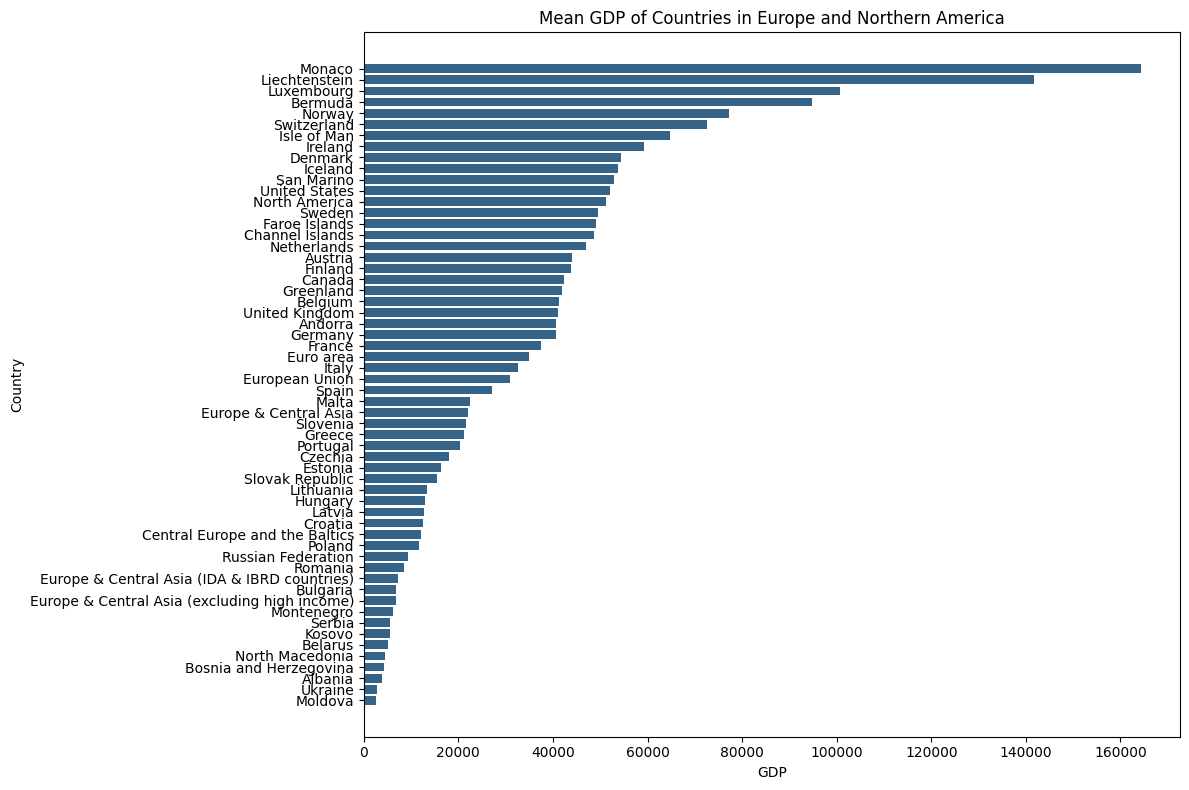

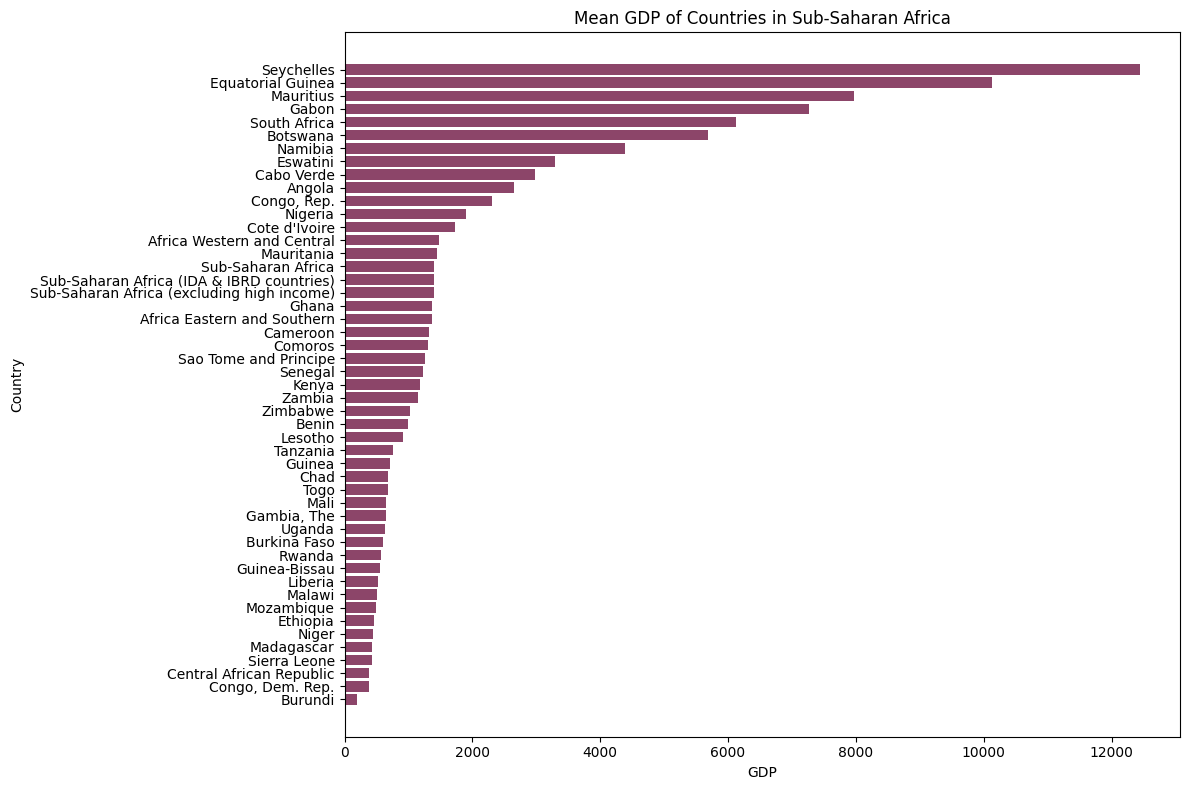

In [133]:
# Plot the mean GDP of each countries in Europe and Northern America
plt.figure(figsize=(12, 8))

data = df_final[df_final['Region'] == 'Europe and Northern America']
data = data.groupby('Country Name')['GDP'].mean().sort_values(ascending=False)
plt.barh(data.index, data.values, color='#366388')

plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('Mean GDP of Countries in Europe and Northern America')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot the mean of GDP of each country in Sub-Saharan Africa
plt.figure(figsize=(12, 8))

data = df_final[df_final['Region'] == 'Sub-Saharan Africa']
data = data.groupby('Country Name')['GDP'].mean().sort_values(ascending=False)
plt.barh(data.index, data.values, color='#8c4569')

plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('Mean GDP of Countries in Sub-Saharan Africa')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



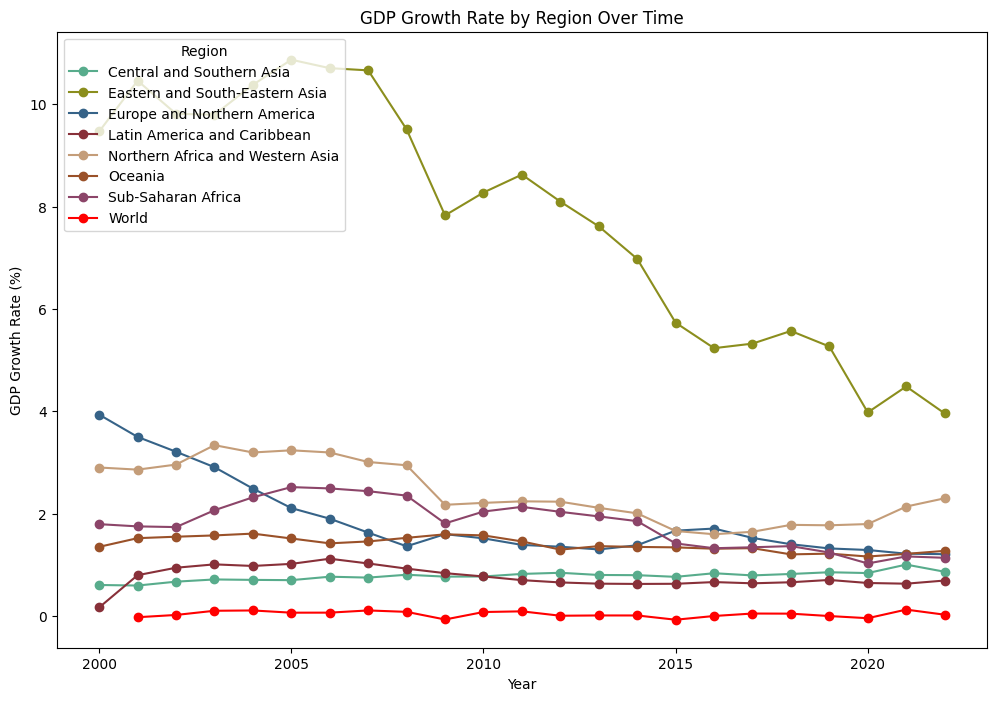

In [134]:
#GDP growth rate of each region
df_final['GDP Growth Rate'] = df_final.groupby('Region')['GDP'].pct_change()

# Plot the GDP growth rate of each region over time
plt.figure(figsize=(12, 8))

for region, data in df_final.groupby('Region'):
    data = data.groupby('Year')['GDP Growth Rate'].mean()
    plt.plot(data.index, data.values, label=region, color=colors[region], marker='o')

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('GDP Growth Rate by Region Over Time')
plt.legend(title='Region', loc='upper left')


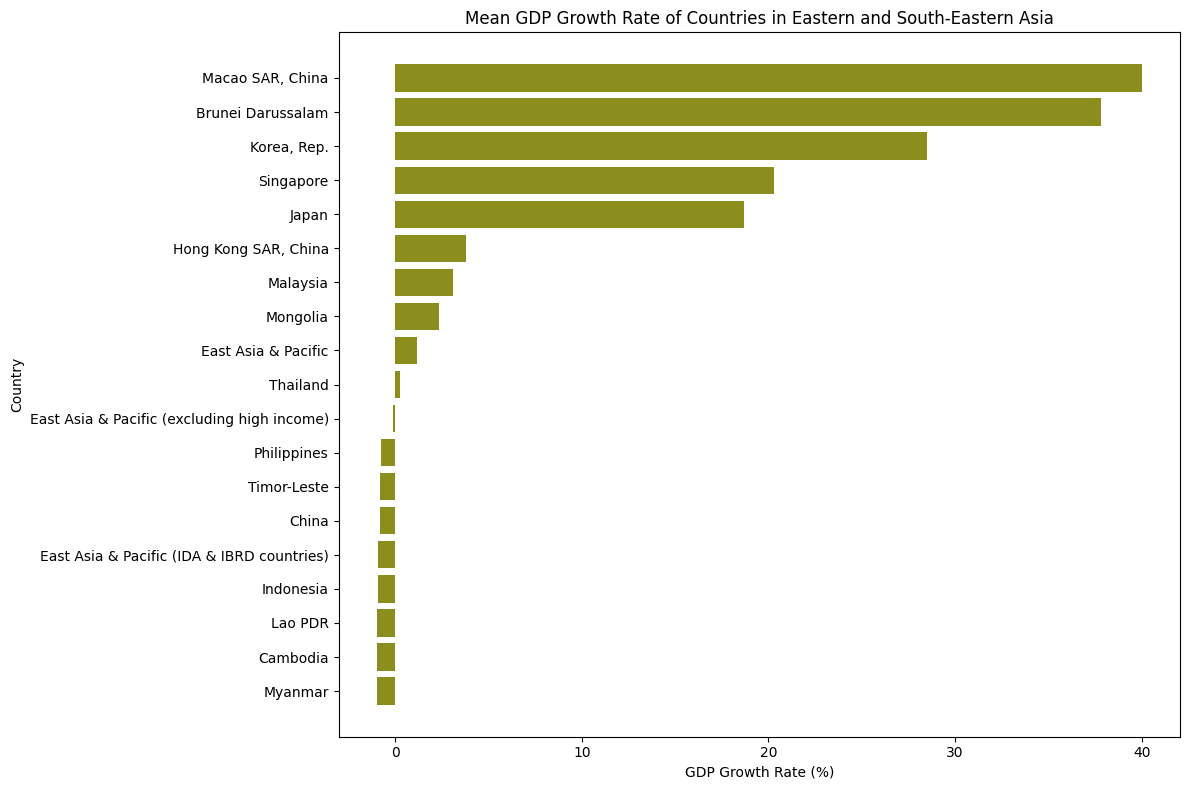

In [135]:
## Plot the GDP growth of each countries in Eastern and South-Eastern Asia
plt.figure(figsize=(12, 8))

data = df_final[df_final['Region'] == 'Eastern and South-Eastern Asia']
data = data.groupby('Country Name')['GDP Growth Rate'].mean().sort_values(ascending=False)
plt.barh(data.index, data.values, color='#8b8e1d')

plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Country')
plt.title('Mean GDP Growth Rate of Countries in Eastern and South-Eastern Asia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
